In [1]:
ctrl_A = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_A_data.h5ad')
#adata_A = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_A_data.h5ad')
#adata_B = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_B_data.h5ad')
#adata_C = anndata.read_h5ad('E://human/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

NameError: name 'anndata' is not defined

In [1]:
from test.SPFinderTester import SPFinderTester
spft = SPFinderTester()
spft.read_10x(file='F://Rep11_MOB_ST.h5ad', amplification=1000, bin_size=80)

In [5]:
spft.normalize()
spft.fit_pattern(100, n_comp=10)
spft.cluster(6)

Building distance array...: 100%|██████████| 100/100 [00:09<00:00, 10.21it/s]


In [4]:
spft.noise_dict['Rbp4']

array([[0.5064827 , 0.18064989],
       [0.38045829, 0.11185921],
       [0.3001565 , 0.59064341],
       [0.35354575, 0.9264778 ],
       [0.68622443, 0.74807783],
       [0.02379486, 0.80072878],
       [0.43429708, 0.16729031],
       [0.39602158, 0.43745734],
       [0.03040911, 0.96712757],
       [0.74715734, 0.85943708],
       [0.23390422, 0.76033399],
       [0.03744085, 0.16325745],
       [0.18897022, 0.25548662],
       [0.48597547, 0.23491846],
       [0.63397965, 0.00448805],
       [0.50169816, 0.37170755],
       [0.93054485, 0.02505997],
       [0.76126138, 0.19413587],
       [0.07633243, 0.47634658],
       [0.08608925, 0.08871822],
       [0.20568374, 0.66544456],
       [0.90549296, 0.62634677],
       [0.89503651, 0.67698648],
       [0.72836392, 0.68682139],
       [0.91026027, 0.43648187],
       [0.13373188, 0.66669373],
       [0.39341219, 0.27440878],
       [0.59635141, 0.53196045],
       [0.10632747, 0.21365901],
       [0.91960836, 0.72671613],
       [0.

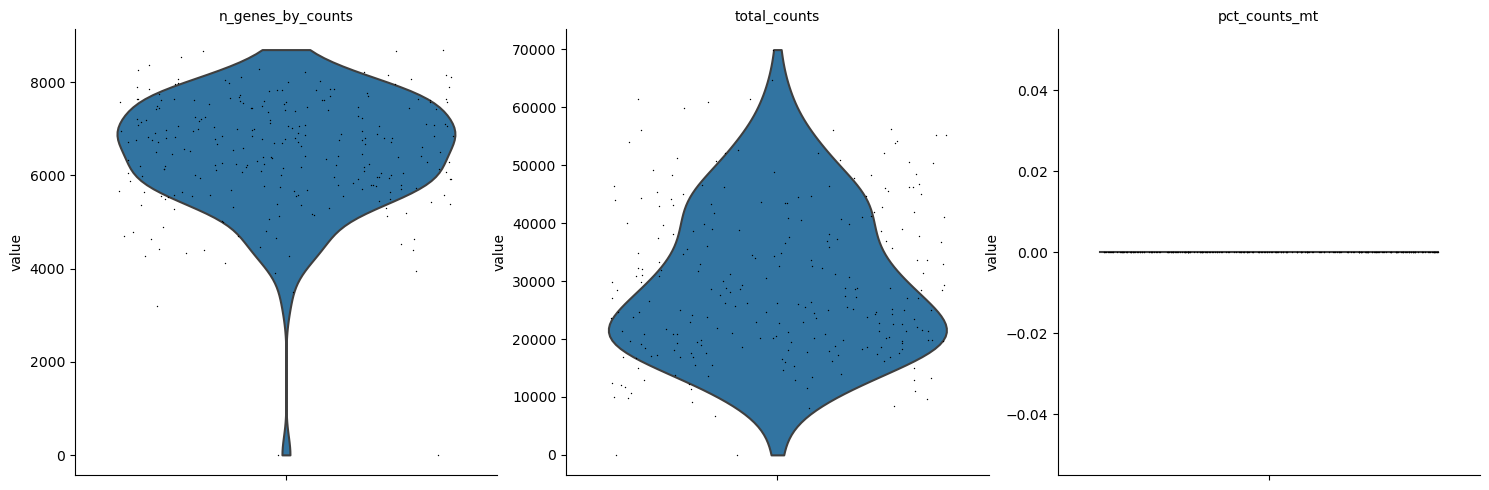

In [63]:
from Algorithm.graph import *
from Algorithm.distribution import *
from IO.read_10X import *


h5_path = 'E://human/GSM4838131_Visium_Sample_A_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838131_Visium_Sample_A_tissue_positions_list.csv'

h5_path = 'E://human/GSM4838133_Visium_Sample_C_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838133_Visium_Sample_C_tissue_positions_list.csv'

h5_path = '/Users/sunpeisen/Downloads/data/GSM4838132_Visium_Sample_B_filtered_feature_bc_matrix.h5'
csv_path = '/Users/sunpeisen/Downloads/data/GSM4838132_Visium_Sample_B_tissue_positions_list.csv'

h5_path = 'E://human/GSM4838132_Visium_Sample_B_filtered_feature_bc_matrix.h5'
csv_path = 'E://human/GSM4838132_Visium_Sample_B_tissue_positions_list.csv'

adata = read_10x_h5ad('F://Rep11_MOB_ST.h5ad', amplification=1000, bin_size=160)
adata.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata, inplace=True)

#sc.pp.filter_genes(adata, min_cells=2)
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var_names_make_unique()

#adata = adata[adata.obs["pct_counts_mt"] < 8]
sc.pl.violin(adata,
             ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
# sc.pp.filter_genes(adata, min_cells=50)


In [46]:
paper = ['Rab3b', 'Necab2', 'Tspan7', 'Cdr1', 'Slc17a7', '4933405L10Rik', 'Taf7l', 'Gna14', 'Olfr635', 'Pmepa1', 'Pcp4',
         'Apc', 'Rbfox3', 'Penk', 'Frzb', 'Fabp7', 'Slc6a11', 'Apod', 'S100a5', 'Arhgap33', 'Cplx1', 'Trnp1', 'Marcks',
         'Atp1b1', 'Vtn', 'Trak2', 'Igf1', 'Gabra1', 'Igfbp2', 'Lpar1', 'Omp', 'Kif5b', 'Sorbs1', 'Cck', 'Nr2f2',
         'Scd1', 'Cpe', 'Aqp4', 'Doc2g', 'Slc1a2', 'Nrgn', 'Cdhr1', 'Mcf2l', 'Kctd12', 'Unc13c', 'Foxd3', 'Prokr2',
         'Gng13', 'Kcnh3', 'Camk2b', 'Baiap2', 'Ccnd1', 'Gpsm1', 'Pbx1', 'Sepp1', 'Apoe', 'Tubb2b', 'Ncdn', 'Glul',
         'Sash1', 'Ptgds', 'Sparcl1', 'Mbp', 'Nrsn1', 'Igfbp5', 'Ptn', 'Sfrp5']
gene_list = adata.var[adata.var['gene_ids'].isin(paper)].index
len(gene_list)
# new_adata = adata[:,gene_list]
# result = convolve(get_3d_matrix(new_adata), method='gaussian', kernel_size=3)
# update_anndata(result, new_adata)

66

In [64]:
sc.pp.highly_variable_genes(adata, n_top_genes=100, flavor='seurat_v3')
sc.pp.normalize_total(adata, inplace=True)
# sc.pp.log1p(adata)

In [65]:
gene_list = list(adata.var[adata.var['highly_variable']].index)
len(gene_list)

100

In [60]:
list(adata.var[adata.var['highly_variable']].index)

['X2010300C02Rik',
 'Pcp4',
 'Ube2ql1',
 'Gm13889',
 'Sez6',
 'Rbfox3',
 'Gng4',
 'Reln',
 'Camk4',
 'Penk',
 'Frzb',
 'Kcnh3',
 'Camk2b',
 'Baiap2',
 'Gda',
 'Nefm',
 'Ccnd1',
 'Apod',
 'S100a5',
 'Gpsm1',
 'Cpne4',
 'Syn1',
 'Nrep',
 'Fam163b',
 'Tubb2b',
 'Egr1',
 'Omp',
 'Ncdn',
 'Icam5',
 'Cck',
 'Gcnt1',
 'Zfp704',
 'Grin1',
 'Ptgds',
 'Nr2f2',
 'Npy',
 'Scd1',
 'Ablim3',
 'Gria3',
 'Necab2',
 'Dpf1',
 'Stxbp6',
 'Sox7',
 'Gad1',
 'Grb2',
 'Txnip',
 'Sv2b',
 'Zfp180',
 'Nefl',
 'Hmgcs2',
 'Dcx',
 'Vip',
 'Cdr1',
 'Mbp',
 'Nr4a1',
 'Col1a2',
 'Beta.s',
 'Slc17a7',
 'Grasp',
 'Nrgn',
 'Npr1',
 'Cdhr1',
 'Tyro3',
 'Kctd12',
 'Igfbp5',
 'Bai2',
 'Mag',
 'Dcn',
 'Igf2',
 'Ptn',
 'Sox11',
 'Unc13c',
 'Nron',
 'Col1a1',
 'Cldn11',
 'Nptx1',
 'Hba.a2',
 'Foxd3',
 'Igfbp4',
 'Ogn',
 'Igfbpl1',
 'Prokr2',
 'Fam110c',
 'Col12a1',
 'Clca1',
 'Ccnd2',
 'Islr2',
 'Cyp2a5',
 'Alg10b',
 'Il12rb2',
 'Gm5176',
 'Rnls',
 'Pabpc5',
 'Bag2',
 'Snora78',
 'X4831440E17Rik',
 'Ggta1',
 'Hist1h1e',
 'Utp

In [71]:
gmm_dict = fit_gmms(adata, gene_list, n_comp=10, max_iter=100)

Fitting GMM...: 100%|██████████| 100/100 [00:17<00:00,  5.60it/s]

Number of dropped genes: 7


In [72]:
from Algorithm.distance import build_gmm_distance_array

arr = build_gmm_distance_array(gmm_dict)

Building distance array...: 100%|██████████| 93/93 [00:08<00:00, 10.96it/s]


In [73]:
result,_ = cluster(arr, n_clusters=5, mds_components=20, method='kmeans')
result

gene_id  labels
0   X2010300C02Rik       3
1             Pcp4       3
2          Ube2ql1       3
3          Gm13889       3
4             Sez6       3
..             ...     ...
88            Rnls       0
89            Bag2       0
90        Hist1h1e       0
91          Utp14b       0
92          Il20ra       0

[93 rows x 2 columns]

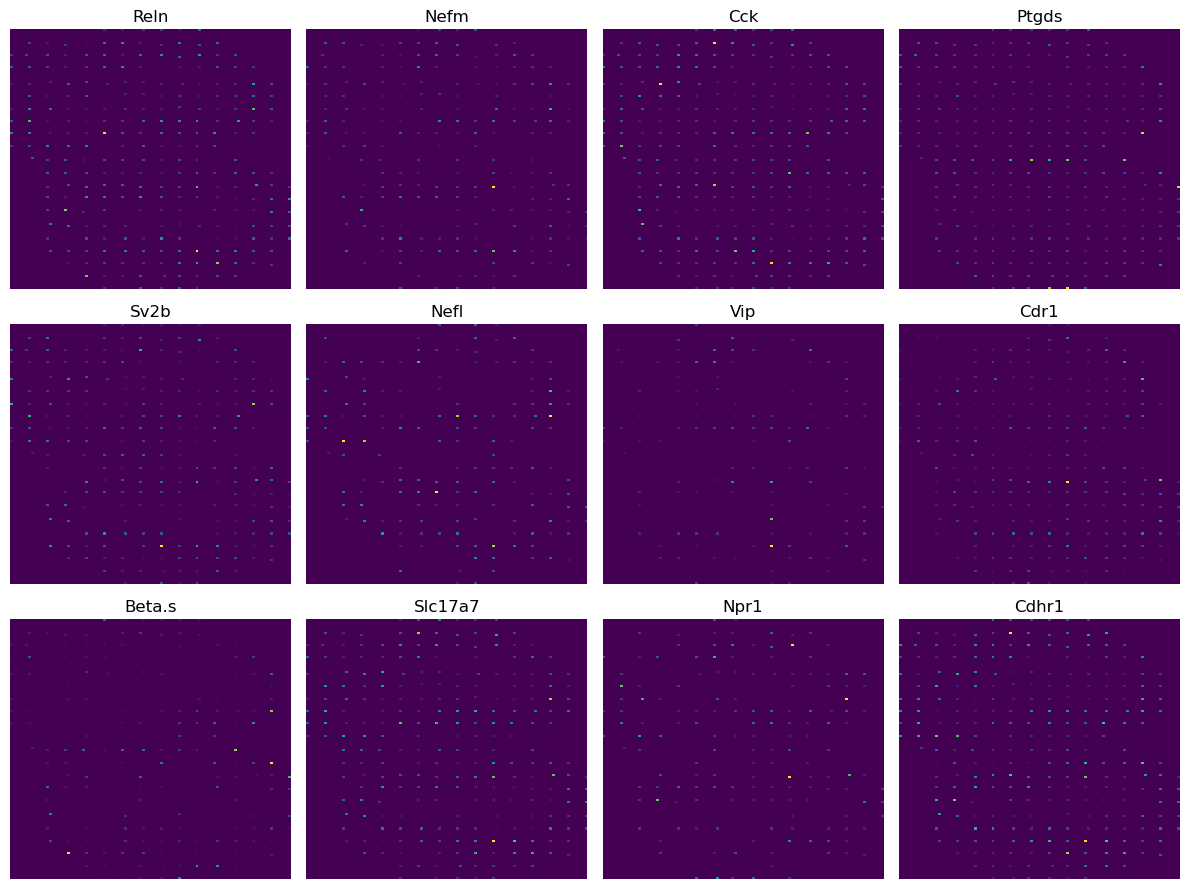

In [74]:
from Utils.plot import plot_heatmap

plot_heatmap(result,4,adata)

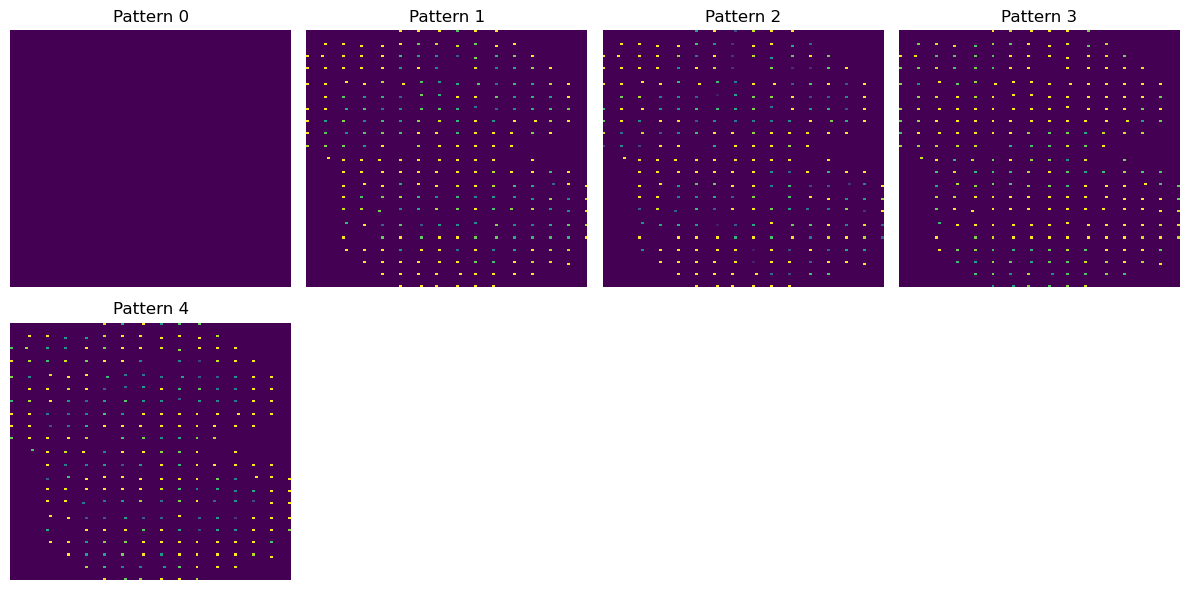

In [76]:
from Utils.plot import plot_pattern

plot_pattern(result, adata, vmax=99)

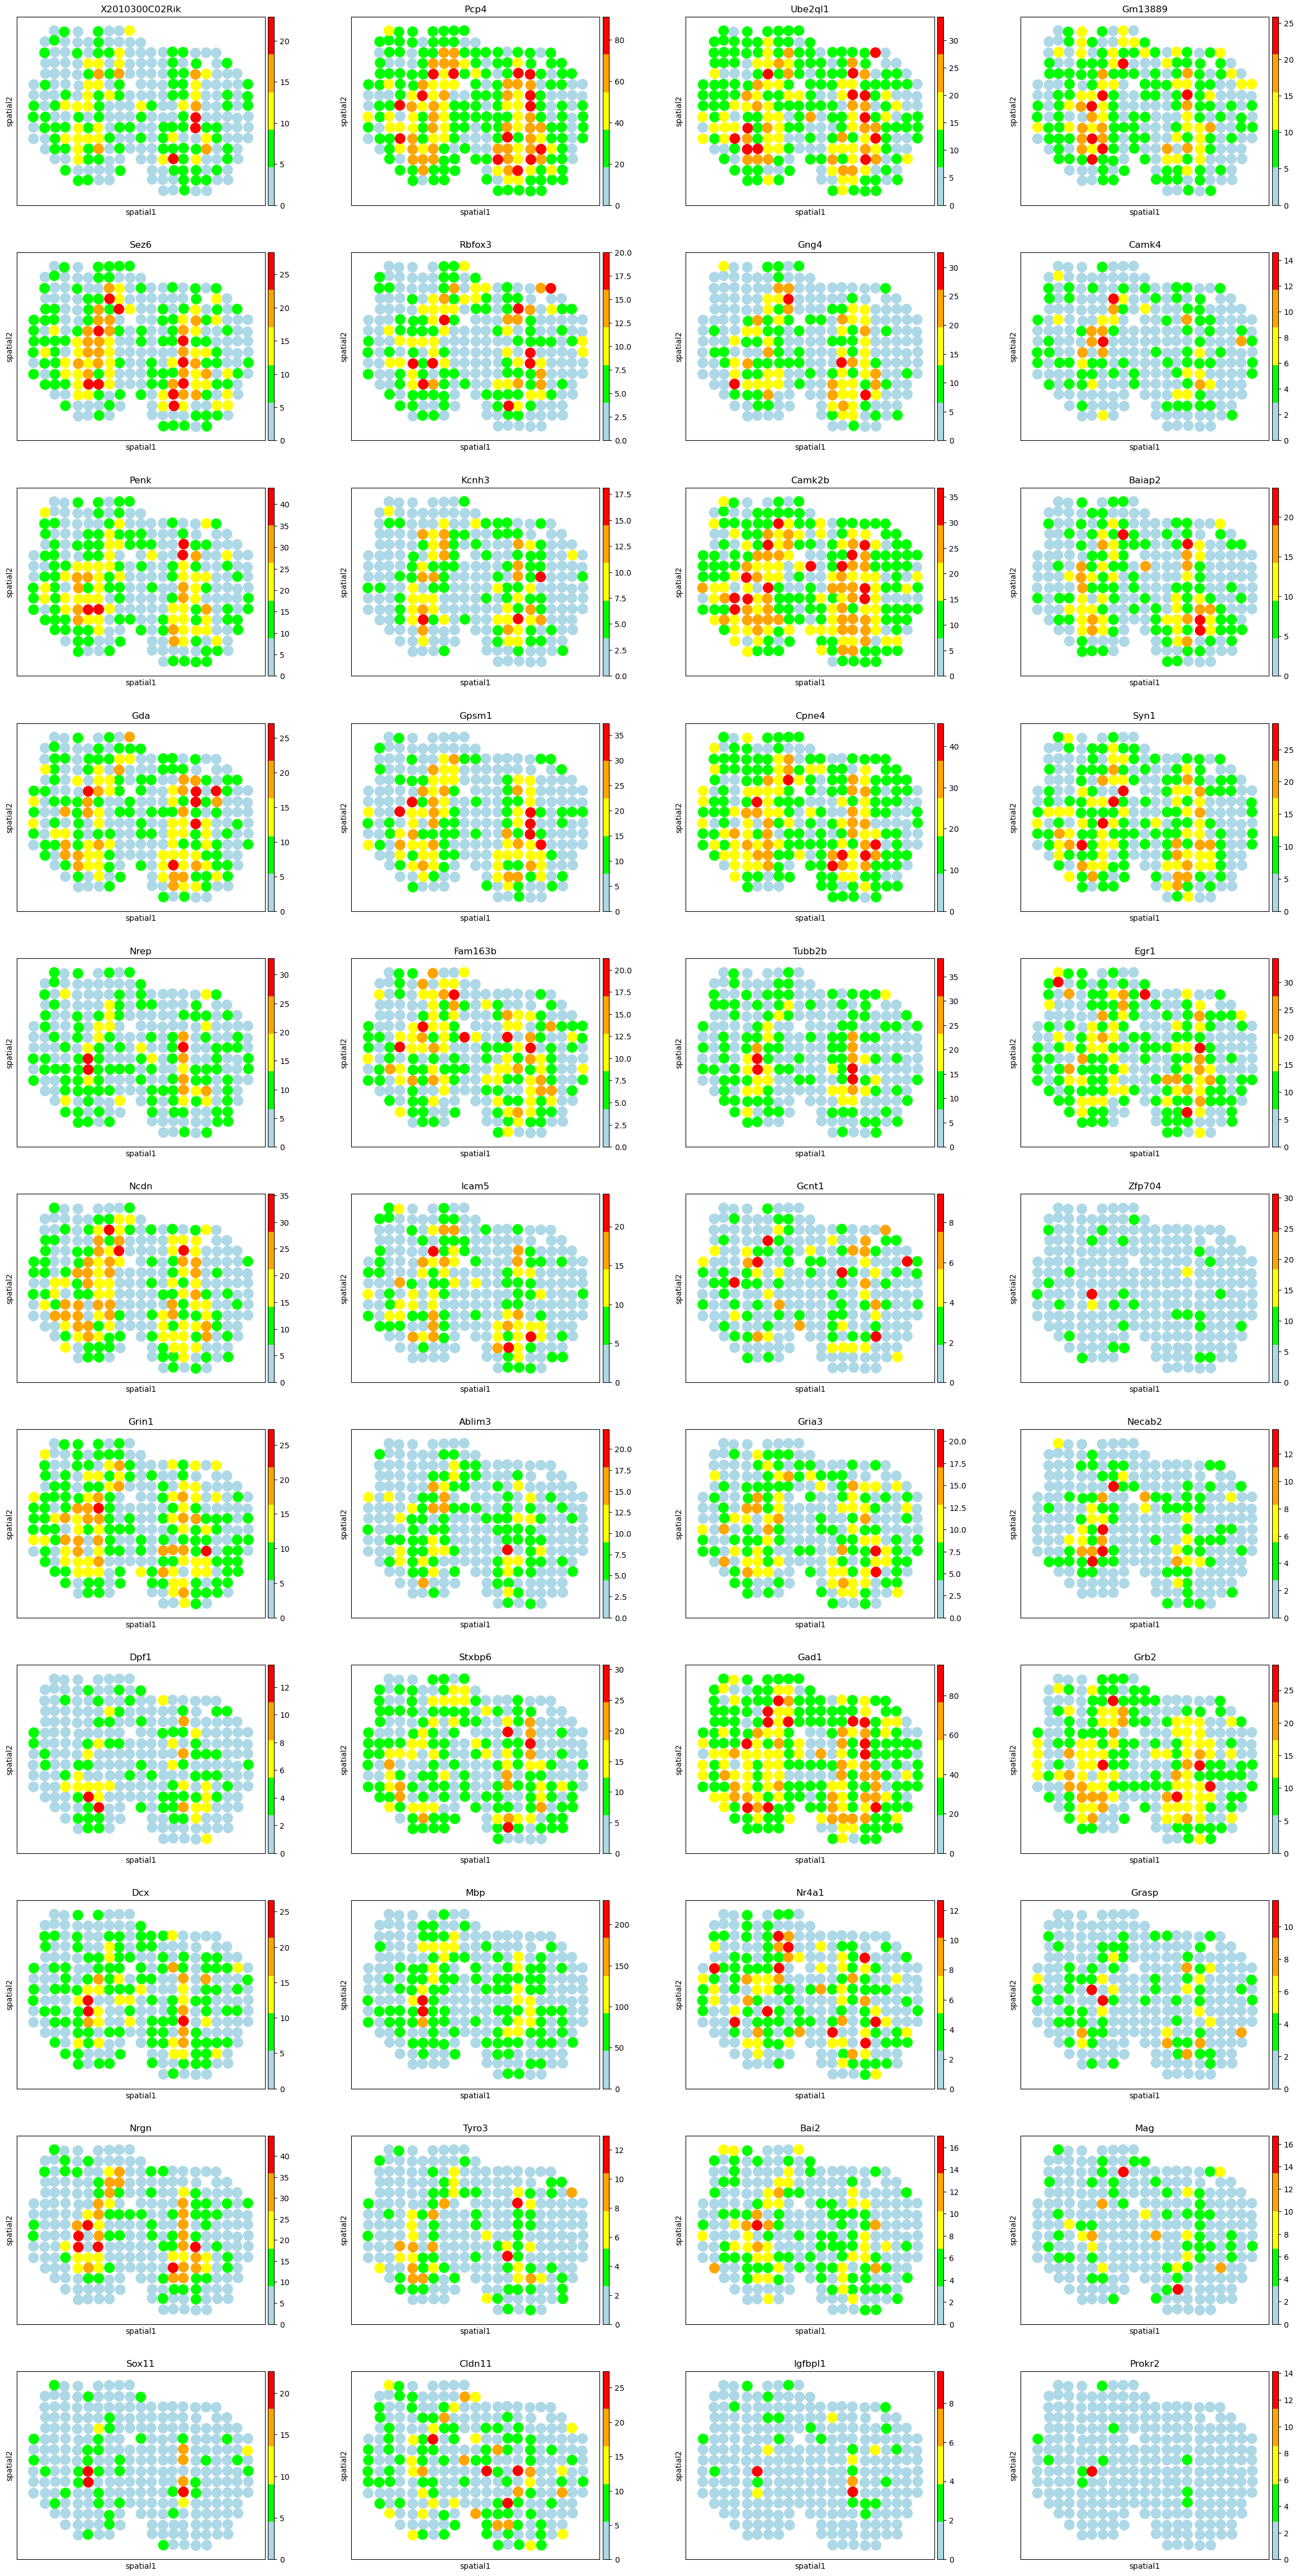

In [84]:
import scanpy as sc
import matplotlib.colors as colors

new_colors = ['lightblue', '#00FF00', '#FFFF00', '#FFA500', '#FF0000']
new_cmap = colors.ListedColormap(new_colors)
sc.pl.spatial(adata,
              size=2,
              spot_size=.5,
              cmap=new_cmap,
              color=result[result['labels']==2]['gene_id']
              )

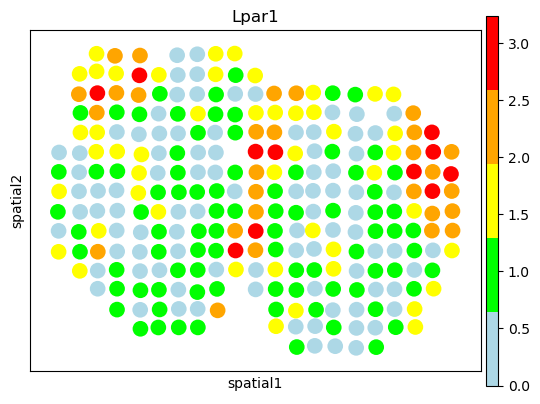

In [77]:
new_colors = ['lightblue', '#00FF00', '#FFFF00', '#FFA500', '#FF0000']
sc.pl.spatial(adata,
              size=.8,
              spot_size=1,
              cmap=new_cmap,
              color=['Lpar1'])

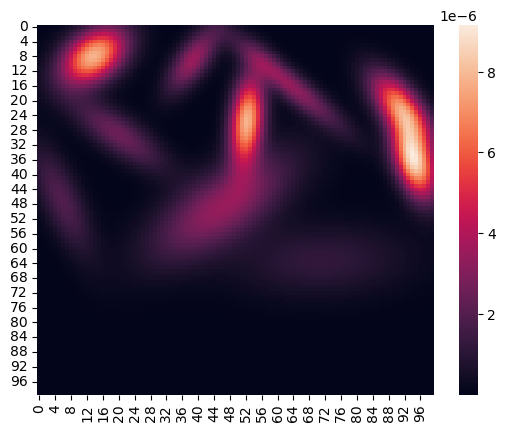

In [61]:
gmm = fit_gmm(adata, 'Lpar1', n_comp=10, max_iter=10000, reg_covar=1e-3)
view_gmm(gmm, scope=(0, max(adata.obs['y'].max(), adata.obs['x'].max())), bin_count=100)

In [149]:
gmm.converged_model_

AttributeError: 'GaussianMixture' object has no attribute 'converged_model_'

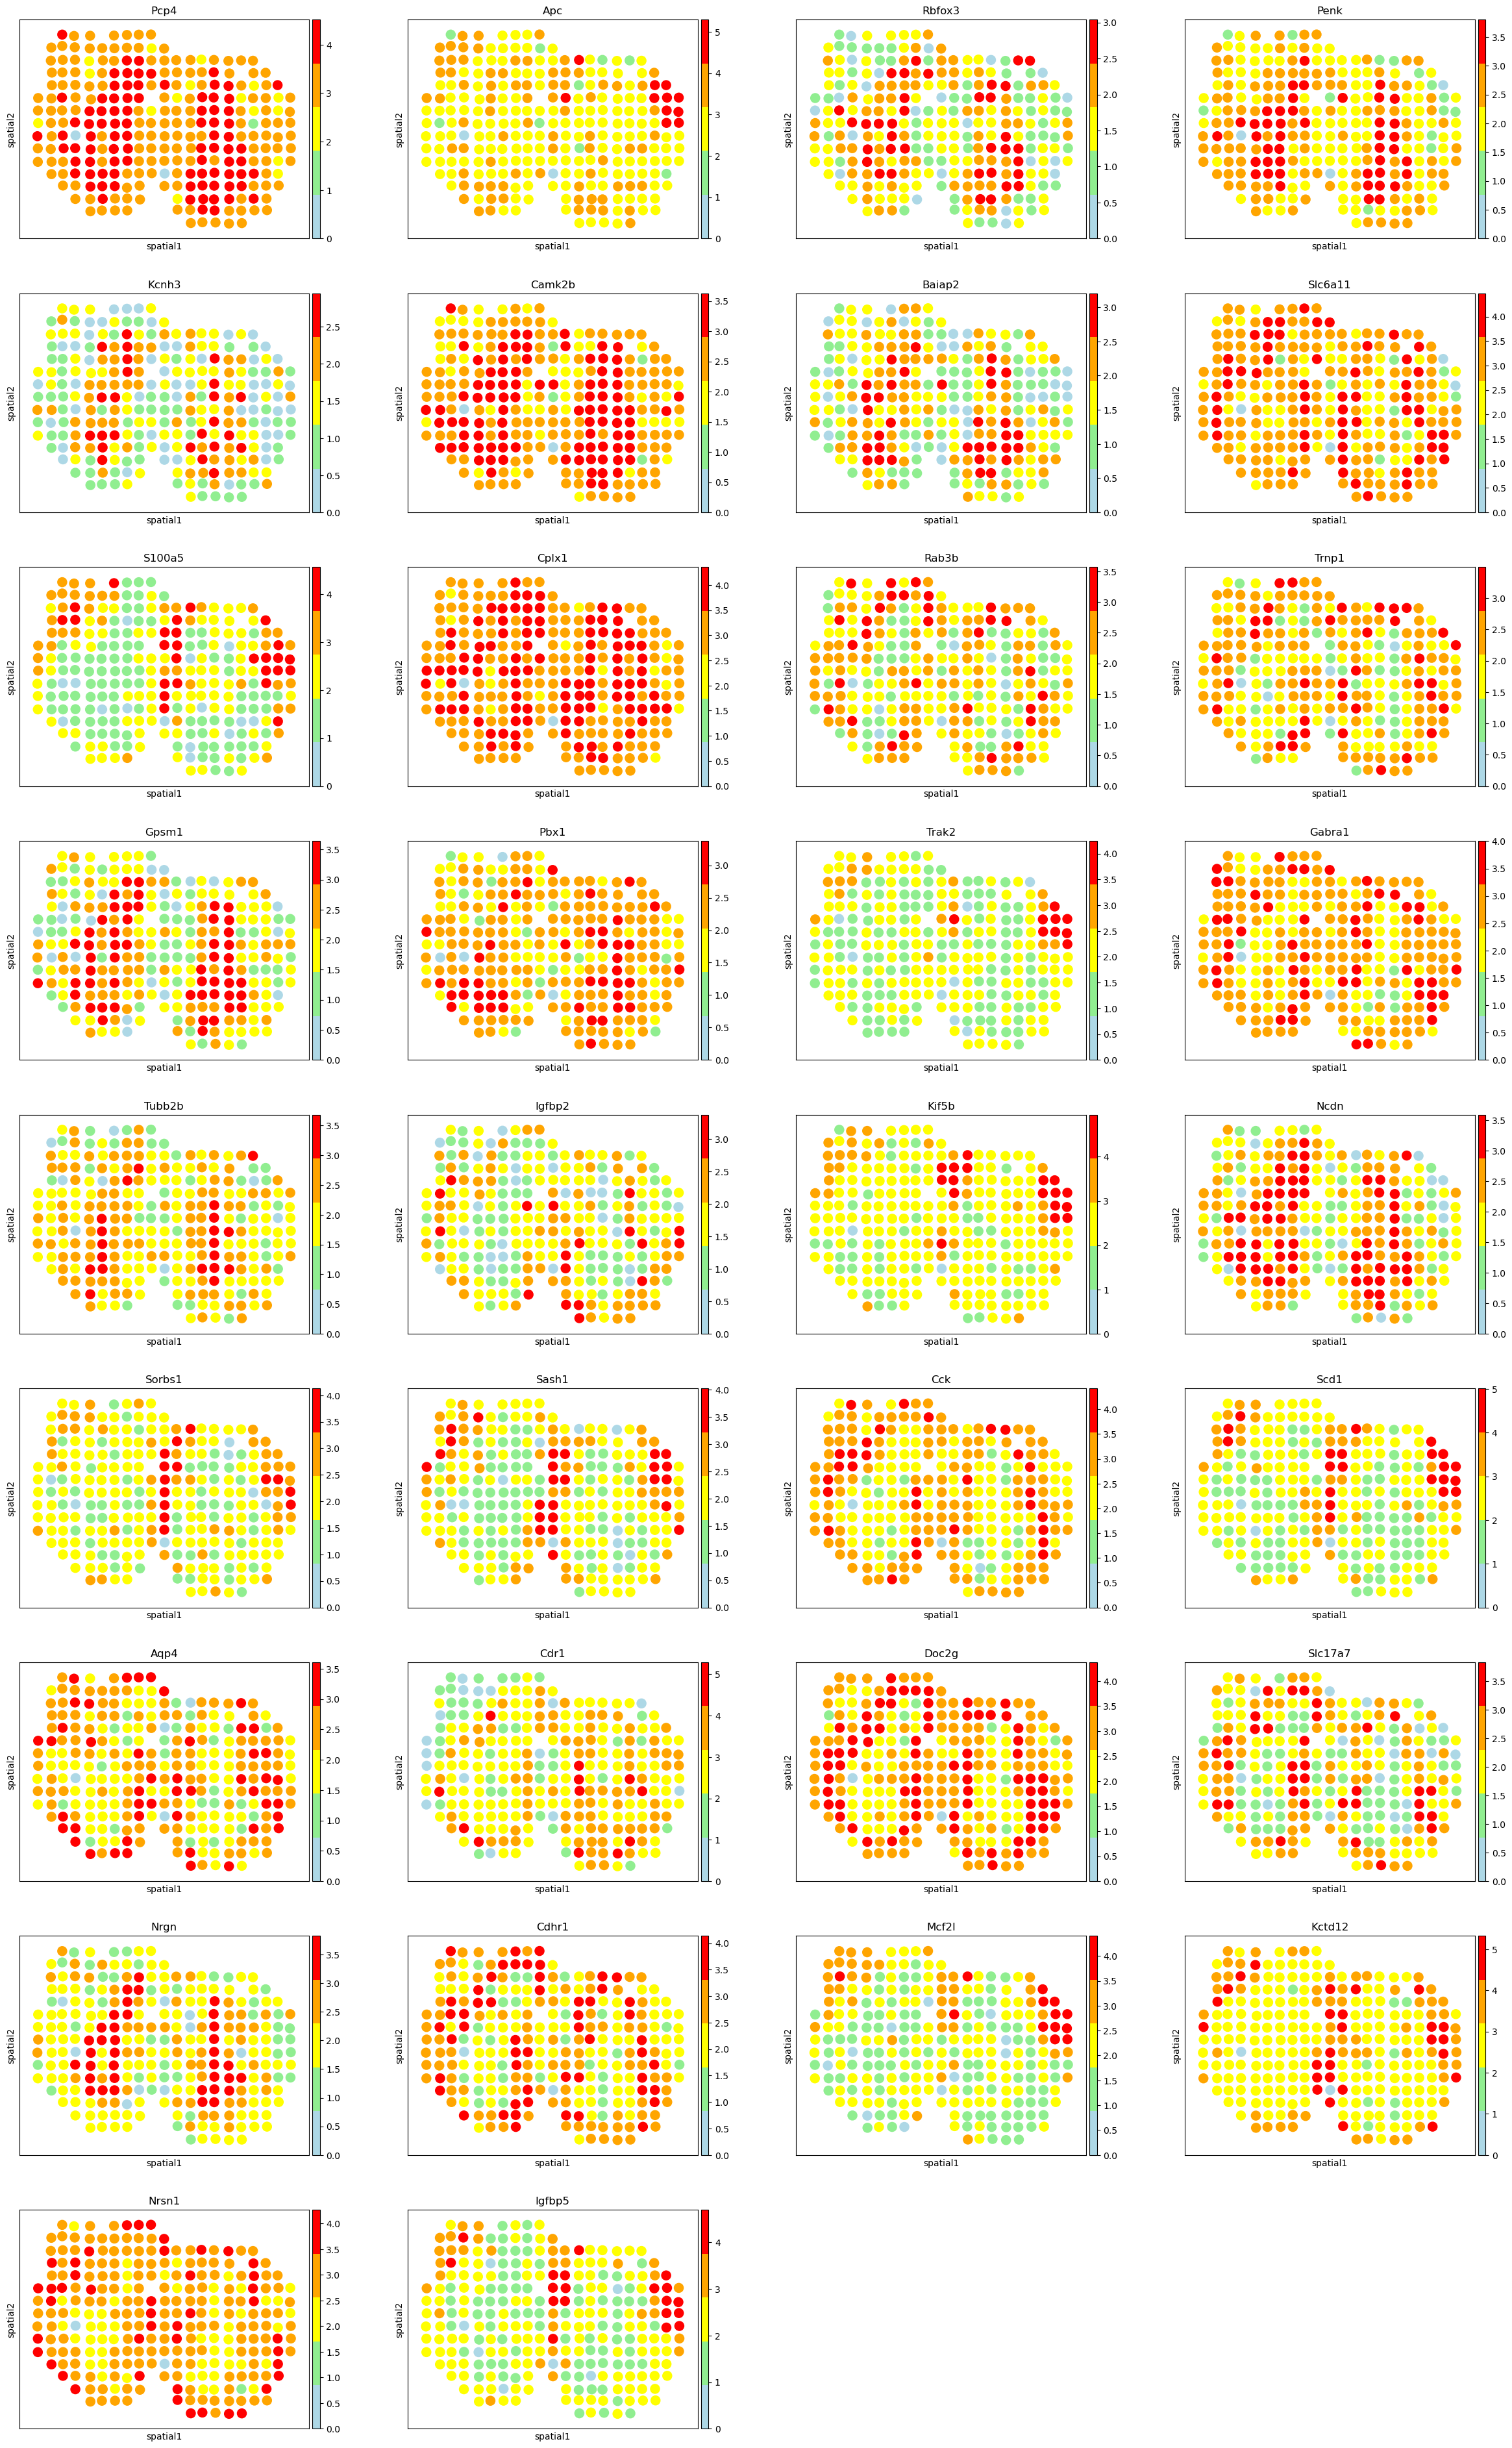

In [66]:
import scanpy as sc
import matplotlib.colors as colors

new_colors = ['lightblue', 'lightgreen', 'yellow', '#FFA500', '#FF0000']
new_cmap = colors.ListedColormap(new_colors)

sc.pl.spatial(new_adata,
              size=.8,
              spot_size=1,
              cmap=new_cmap,
              color=result[result['labels']==1]['gene_id'])

In [16]:
from Algorithm.graph import *
graph = build_graph(gmm_dict, distance_threshold=1.1)

100%|██████████| 62/62 [00:13<00:00,  4.63it/s]


In [5]:
import numpy as np
import cv2

#p、q是两个矩阵，第一列表示权值，后面三列表示直方图或数量

pp=cv2.fromarray(p)
qq=cv2.fromarray(q)
emd=cv2.CalcEMD2(pp,qq,cv2.CV_DIST_L2)

NameError: name 'cv' is not defined

In [7]:
from scipy.stats import wasserstein_distance

import cv2.




AttributeError: module 'cv2' has no attribute 'cv'

In [61]:
import ot

X = np.array([[1, 5, 1, 0],
              [5, 10, 5, 0],
              [1, 5, 1, 0],
              [0, 0, 0, 0]], np.float32)

Y = np.array([[0, 0, 0, 0],
              [0, 1, 5, 1],
              [0, 5, 10, 5],
              [0, 1, 5, 1]], np.float32)

coords = np.array([X.flatten(), Y.flatten()]).T
coordsSqr = np.sum(coords ** 2, 1)
M = coordsSqr[:, None] + coordsSqr[None, :] - 2 * coords.dot(coords.T)
# M[M < 0] = 0
M = np.sqrt(M)

ot.sinkhorn2(X.flatten(), Y.flatten(), M, 1.0)

0.075425655

In [100]:
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment

a = np.array([[1, 5, 1, 0],
              [5, 10, 5, 0],
              [1, 5, 1, 0],
              [0, 0, 0, 0]], np.int32)

b = np.array([[0, 5, 5, 0],
              [0, 10, 5, 0],
              [0, 5, 10, 0],
              [0, 1, 0, 1]], np.int32)


d = cdist(a, b)
assignment = linear_sum_assignment(d)
print(d[assignment].sum() / 16)

1.224544020383011


In [65]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
xs = np.array([[6, 5, 1, 0],
              [5, 10, 5, 0],
              [1, 5, 1, 0],
              [0, 2, 8, 0]], np.int32)

xt = np.array([[0, 5, 5, 0],
              [0, 10, 5, 0],
              [0, 5, 10, 0],
              [0, 3, 10, 0]], np.int32)
n = 16
a, b = np.ones((n,)) / n, np.ones((n,)) / n
M = ot.dist(xs, xt)
print(M)

[[ 52  77 117 121]
 [ 50  25  75  99]
 [ 17  42  82  86]
 [ 18  73  13   5]]


Text(0.5, 1.0, 'Cost matrix M')

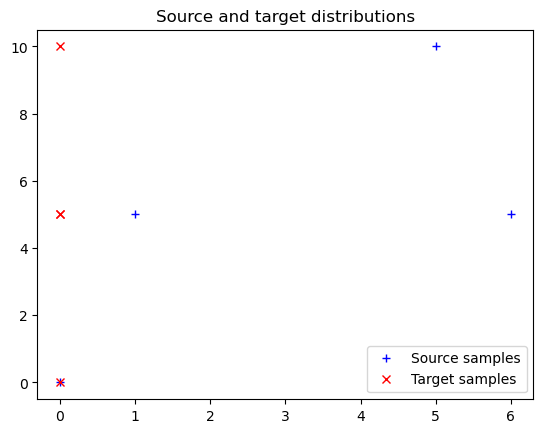

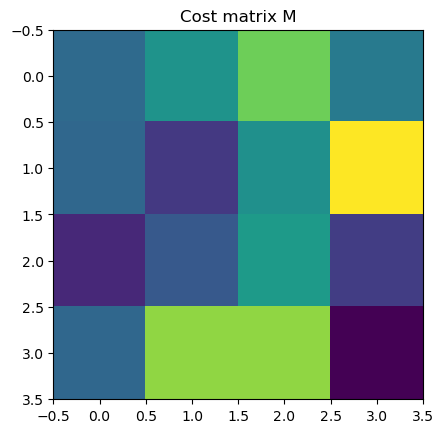

In [64]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

In [74]:
n = 5000  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)

Text(0.5, 1.0, 'Cost matrix M')

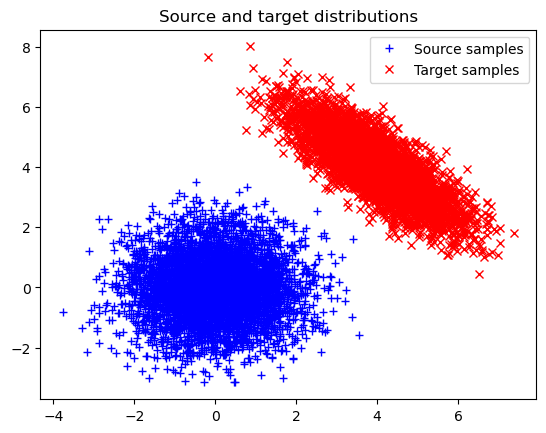

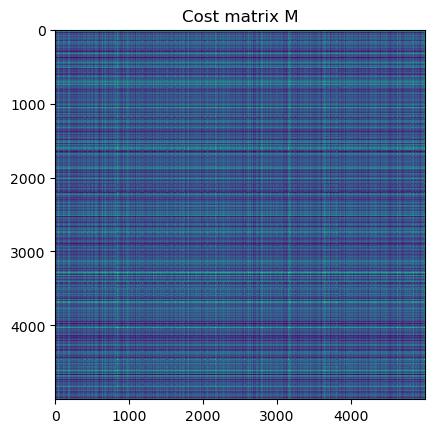

In [83]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')